## process C3D files into time series of marker data
- c3d file is a F x n x (x,y,z) dimension file, where F = number of frames, n = number of markers detected from acquisition
- labels are stored in reader.point_labels

In [10]:
import c3d 
import numpy as np
import matplotlib.pyplot as plt
import functions

In [11]:

# Open the .c3d file
with open('/Users/anqizhou/FastTrack/sampleData_11-15-2024/Sain_2019_11_15_DAp_GBMOV_T1_OFF_GNG_GAIT_001.c3d', 'rb') as f:
    reader = c3d.Reader(f)
    
    # Initialize data structures to store extracted data
    markers = []
    frame_numbers = []

    # Iterate over frames
    #for i, (points, analog) in enumerate(reader.read_frames()):
    for i, points in enumerate(reader.read_frames()):
        frame_numbers.append(i)
        markers.append(points[1][:,:3])  # Extract 3D positions (x, y, z), which are the first three values stored in the 1st tuple position
        #analog_data.append(analog)    # Extract analog signals (e.g., force plates)

# Convert to numpy arrays for easier manipulation
import numpy as np
markers = np.array(markers)        # Shape: (frames, markers, 3)
markers = np.transpose(markers, (1, 2, 0)) # change the shape so that it is (markers, 3, frames)

# create a dataset with label dictionary
data = {
    'marker_labels': reader.point_labels,
    'time_series_data': replace_zeros_with_neighbors_mean(markers,3),
}
# to clean the data, let's assume that processes are linear over 3 timesteps
# data['marker_labels'] # test to retrieve marker labels from the data, note that labels that start with * are unlabled markers

# visualize the raw data

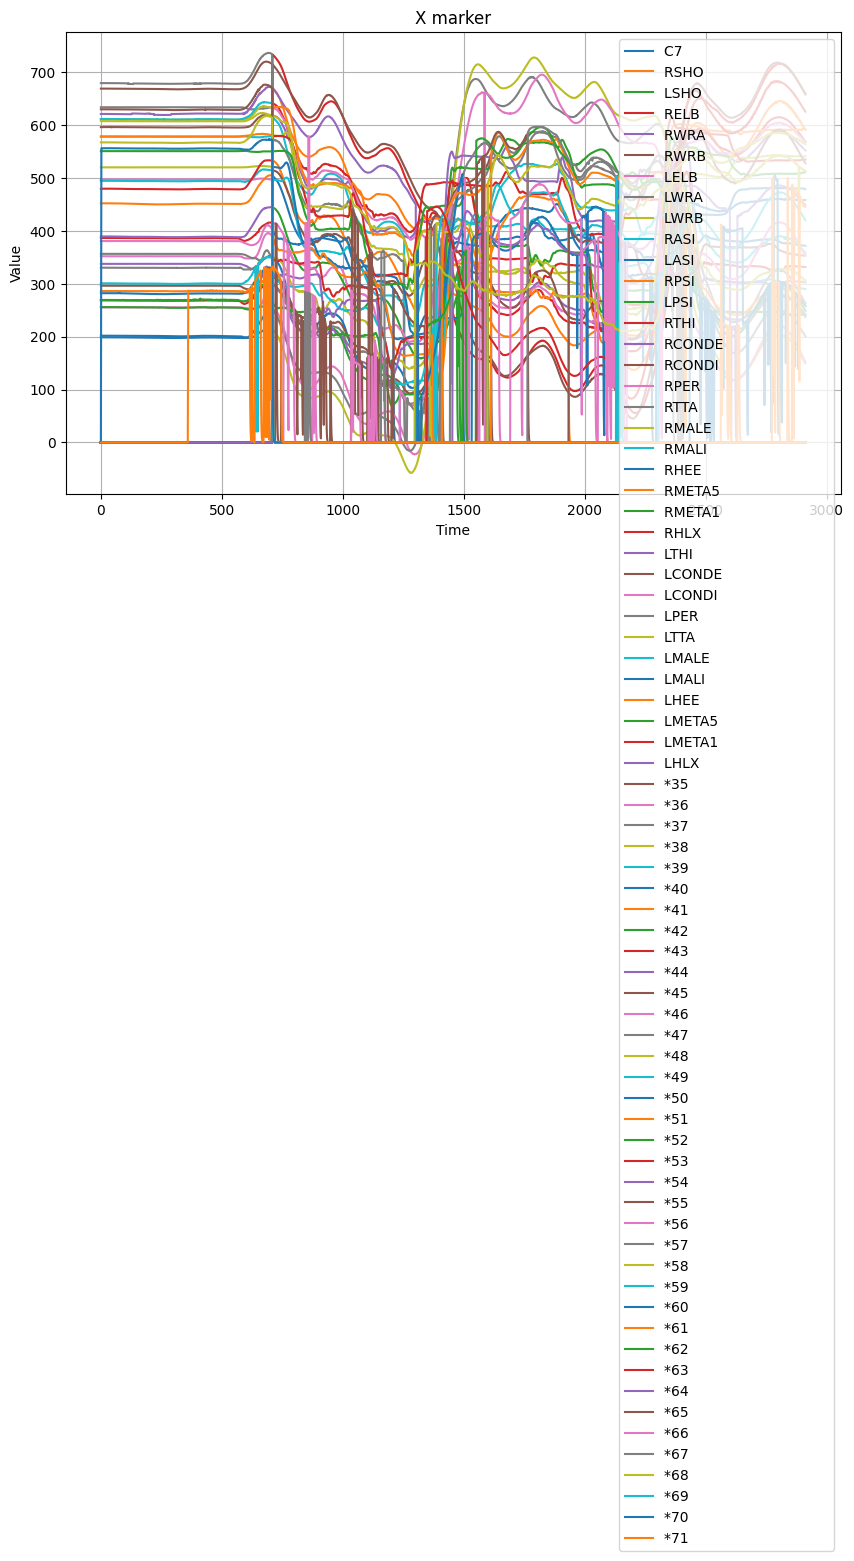

In [12]:
# x,y,z info for each marker i is stored as data['time_series_data'][i][0], [i][1], or [i][2]

plt.figure(figsize=(10, 6))
for i in range(len(data['time_series_data'])):
    plt.plot(np.linspace(0, len(data['time_series_data'][0][0]), num=len(data['time_series_data'][0][0])), 
        data['time_series_data'][i][0], label=data['marker_labels'][i])
plt.title('X marker')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()